In [12]:
import cv2
import numpy as np
from skimage.exposure import rescale_intensity
import matplotlib.pyplot as plt
from skimage import color


In [11]:
%matplotlib inline

## Convolute the image with raccoon

In [192]:
def conv(image, kernel):
    # convert image to grayscale
    if image.shape[-1] == 3:
        image = color.rgb2gray(image)
    # image matrix width and height
    imheight, imwidth = image.shape
    # convolutional kernel width and height
    kerheight, kerwidth = kernel.shape
    # reserving memory for the output matrix
    padding = (kerwidth - 1) // 2
    # apply padding to the output image to ensure that the dimensions of the input and output images are the same
    image = cv2.copyMakeBorder(image, padding, padding, padding, padding, cv2.BORDER_REPLICATE)
    # width and height of the output matrix are not reduced
    output = np.zeros((imheight, imwidth), dtype="float")
    
    # Go over every pixel in the grayscale image matrix
    for y in np.arange(padding, imheight + padding):
        for x in np.arange(padding, imwidth + padding):
            # Get the region of interest (ROI) of the image by extracting the central region of the current X,Y position
            roi = image[y-padding:y+padding+1, x-padding:x+padding+1]

            # perform the convolution (yes, in only one string!)
            convoluted_value = (roi * kernel).sum()
            # put the convolved value into the X,Y position of the output image 
            output[y-padding,x-padding] = convoluted_value
    
    return output
            # convert [0,1] --> [0,255]

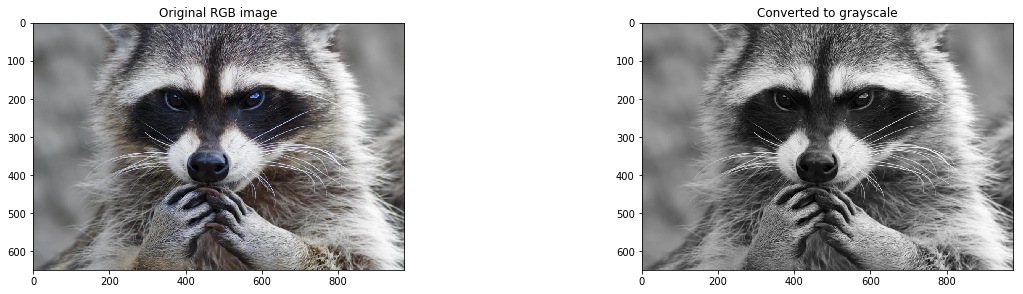

In [244]:
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.title("Original RGB image")
plt.imshow(image)
plt.subplot(222)
plt.title("Converted to grayscale")
plt.imshow(gray_image, cmap='gray')
plt.show()

## Convolutional kernel

In [71]:
kernel = np.array([[1,0,1], [0,1,0], [1,0,1]])

In [242]:
image = plt.imread('images/raccoon.jpg')
gray_image = color.rgb2gray(image)

In [243]:
image.shape

(649, 975, 3)

In [193]:
convolved_image = conv(image, kernel)

## Compare convoluted image and a grayscale

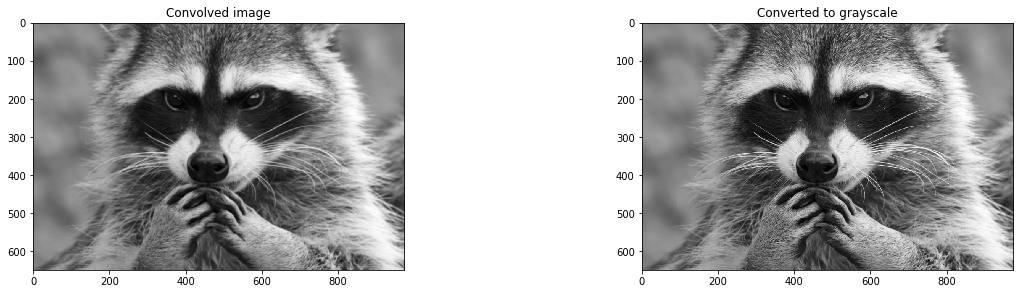

In [194]:
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.title('Convolved image')
plt.imshow(convolved_image, cmap='gray')
plt.subplot(222)
plt.title('Converted to grayscale')
plt.imshow(gray_image, cmap='gray')
plt.show()


## Add some more conv kernels

In [195]:
kernel_2 = np.array([[1,2,1], [2,1,2], [1,2,1]])
kernel_3  = np.array([[1,0,1,0,1],
                      [0,1,0,1,0],
                      [1,0,1,0,1],
                      [0,1,0,1,0],
                      [1,0,1,0,1]])
kernel_4 = np.array([ [1,2,1,2,1],
                      [2,1,2,1,2],
                      [1,2,1,2,1],
                      [2,1,2,1,2],
                      [1,2,1,2,1]])
kernel_5 = np.array([ [1,22,1,2,1],
                      [2,1,22,1,22],
                      [1,2,12,2,1],
                      [2,21,2,1,22],
                      [1,2,12,2,1]])
kernel_6 = np.ones((7, 7), dtype="float") * (1.0 / (7 * 7))
kernel_7 = np.ones((21, 21), dtype="float") * (1.0 / (21 * 21))




## Convolute


In [196]:
conv_2_img = conv(image, kernel_2)
conv_3_img = conv(image, kernel_3)
conv_4_img = conv(image, kernel_4)

conv_5_img = conv(image, kernel_5)
conv_6_img = conv(image, kernel_6)

conv_7_img = conv(image, kernel_7)


## Plot the images

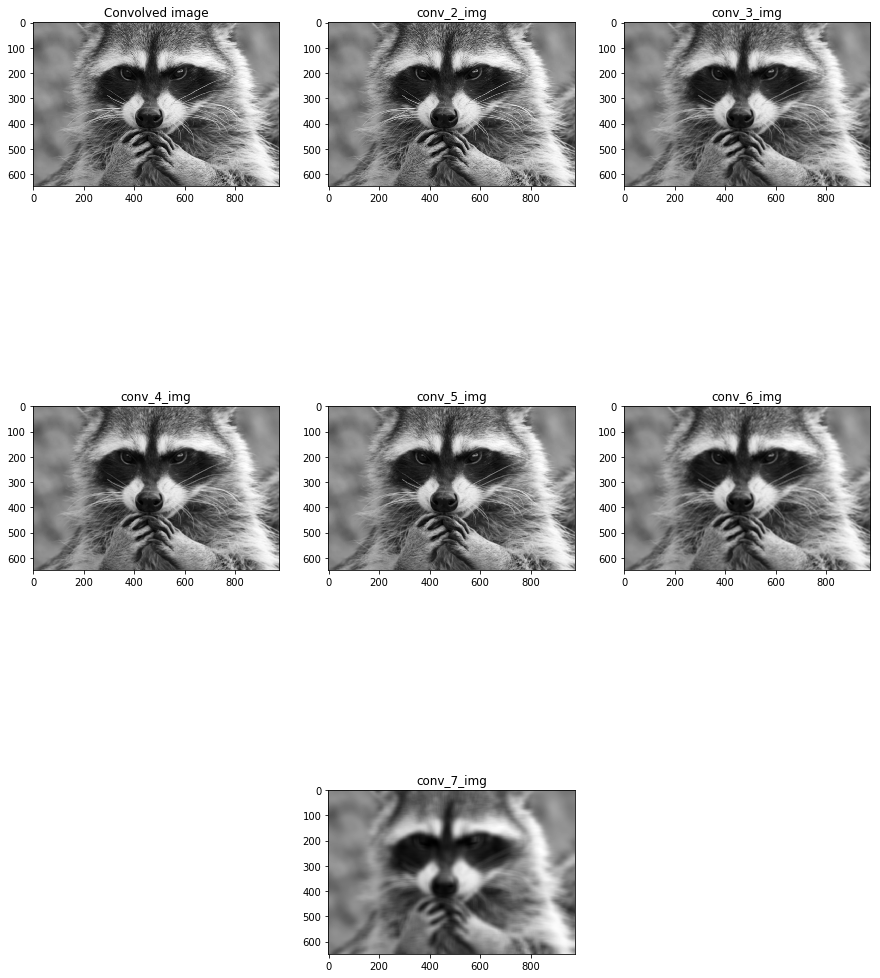

In [197]:
plt.figure(figsize=(15,20))
plt.subplot(331)
plt.title('Convolved image')
plt.imshow(convolved_image, cmap='gray')

plt.subplot(332)
plt.title('conv_2_img')
plt.imshow(conv_2_img, cmap='gray')

plt.subplot(333)
plt.title('conv_3_img')
plt.imshow(conv_3_img, cmap='gray')

plt.subplot(334)
plt.title('conv_4_img')
plt.imshow(conv_4_img, cmap='gray')

plt.subplot(335)
plt.title('conv_5_img')
plt.imshow(conv_5_img, cmap='gray')

plt.subplot(336)
plt.title('conv_6_img')
plt.imshow(conv_6_img, cmap='gray')

plt.subplot(338)
plt.title('conv_7_img')
plt.imshow(conv_7_img, cmap='gray')

plt.show()

## A little bit smarter filters

In [198]:
sharpen = np.array((
[0, -1, 0],
[-1, 5, -1],
[0, -1, 0]), dtype="int")


laplacian = np.array((
[0, 1, 0],
[1, -4, 1],
[0, 1, 0]), dtype="int")

sobelX = np.array((
[-1, 0, 1],
[-2, 0, 2],
[-1, 0, 1]), dtype="int")

sobelY = np.array((
[-1, -2, -1],
[0, 0, 0],
[1, 2, 1]), dtype="int")

emboss = np.array((
[-2, -1, 0],
[-1, 1, 1],
[0, 1, 2]), dtype="int")

In [199]:
kernelBank = (
("small_blur", smallBlur),
("large_blur", largeBlur),
("sharpen", sharpen),
("laplacian", laplacian),
("sobel_x", sobelX),
("sobel_y", sobelY),
("emboss", emboss)
    )

## Images with convolutional filters

small_blur kernel
large_blur kernel
sharpen kernel
laplacian kernel
sobel_x kernel
sobel_y kernel
emboss kernel


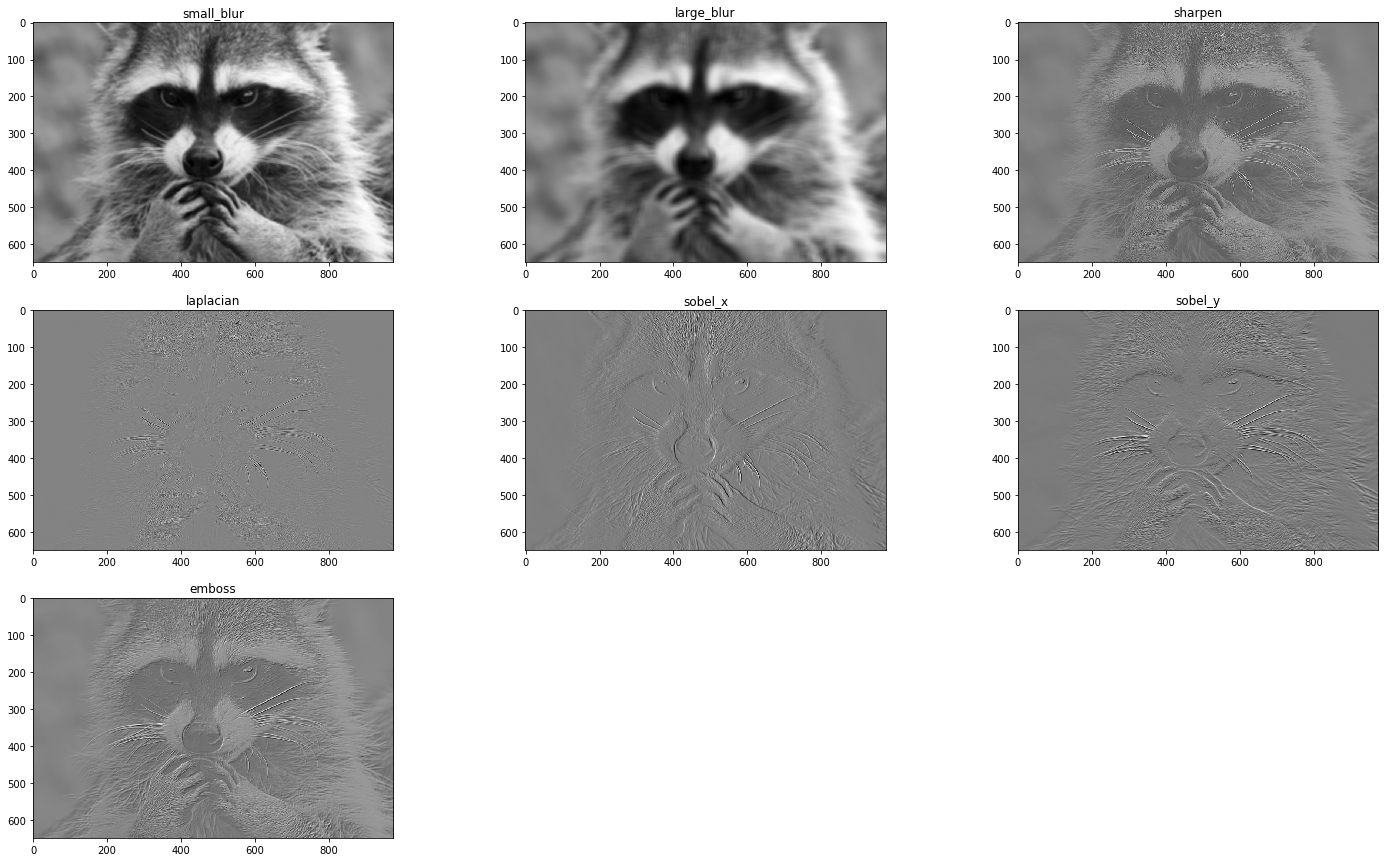

In [204]:
constraint = int(np.sqrt(len(kernelBank))) + 1
t = 0
plt.figure(figsize=(25,15))
for (kernelName, kernel) in kernelBank:
    t += 1
    print(f'{kernelName} kernel')

    plt.subplot(110 * constraint + t)
    plt.title(kernelName)
    plt.imshow(conv(image, kernel), cmap='gray')
plt.show()


## What happens if I try to get the mean square of three RGB-channels?

In [211]:
img_sqrt = np.sqrt(np.square(image[:,:,0])+np.square(image[:,:,1])+np.square(image[:,:,2])).astype("uint8")

In [237]:
(np.square(image[0,0,0]).astype('int64') + np.square(image[0,0,1]).astype('int64') + np.square(image[0,0,2]).astype('int64'))

257

In [239]:
t = np.sqrt(np.square(image[:,:,0]).astype('int64')+np.square(image[:,:,1]).astype('int64')+np.square(image[:,:,2]).astype('int64')).astype('int32')

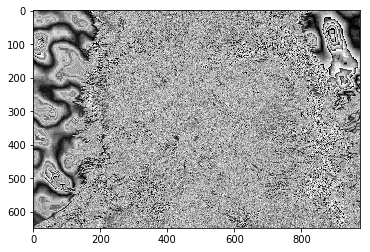

In [245]:
plt.imshow(t, cmap='gray')
plt.show()